In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('big_mart_train.csv')
test = pd.read_csv('big_mart_test.csv')
%matplotlib inline

In [2]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [3]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [4]:
#merging the test dataset with train to get more insights on our dataset
target = train['Item_Outlet_Sales']
train1 = train.drop('Item_Outlet_Sales',axis = 1)
df = pd.concat([train1,test],axis = 0) #dataset with both train and test

In [5]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
df['Item_Weight'].mean()

12.792854228644991

In [8]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [9]:
#filling the null values
df1 = df.copy()

In [10]:
df1['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace = True)
df1['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace = True) #Mode[0] as the values of mode can be more than 1

In [11]:
df1.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [12]:
pd.set_option('display.max_columns', None)
df1.head(2)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [13]:
df1.nunique()

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='Item_MRP'>

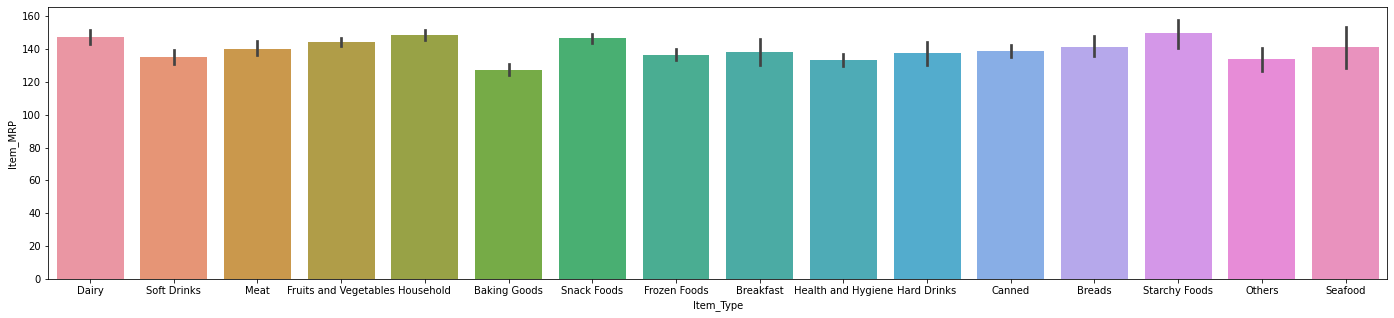

In [14]:
plt.figure(figsize = (24,5))
sns.barplot(x= 'Item_Type',y = 'Item_MRP',data = df1)

In [15]:
#converting multiple same values into one
df1['Item_Fat_Content'].unique()
#array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].apply(lambda x : x.upper())
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace(['LF','REG'],['LOW FAT', 'REGULAR'])
df1['Item_Fat_Content'].unique()
#array(['LOW FAT', 'REGULAR'], dtype=object)

array(['LOW FAT', 'REGULAR'], dtype=object)

In [16]:
df1.nunique()

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 2
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
dtype: int64

In [17]:
#creating dummy variables
dummy = pd.get_dummies(df1,columns = ['Item_Fat_Content','Outlet_Establishment_Year','Item_Type','Outlet_Type','Outlet_Size','Outlet_Location_Type','Outlet_Identifier'],
               drop_first = True)

#merging the dataset and fummy variables
df2 = pd.concat([df1,dummy],axis = 1)

#dropping duplicate columns
df3 = df2.T.drop_duplicates().T

#dropping the columns for which the dummy variables are created
df4 = df3.drop(columns = ['Item_Fat_Content','Outlet_Establishment_Year','Item_Type','Outlet_Type','Outlet_Size','Outlet_Location_Type','Outlet_Identifier'])


In [18]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,LOW FAT,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,REGULAR,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,LOW FAT,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,REGULAR,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store
4,NCD19,8.93,LOW FAT,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [20]:
df1['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)